# 체격을 보고 초,중,고등학생을 구분하는 인공지능 구축

# 설정사항 
- 피처 : 키 ,몸무게, 성별
- 레이블 : 학교의 종류(원 핫 벡터로 변환)
- 데이터 노멀라이즈 : 피쳐의 숫자 범위가 달라 학습시 문제가 발생할 수 있음. 
체중과 키를 모두 0과 1 사이의 값으로 변환함.

# 데이터 전처리

In [37]:
import numpy as np
import os
import random
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [38]:
data = pd.read_csv('./data/학생건강검사 결과분석 rawdata_서울_2015.csv',encoding = 'cp949')

In [39]:
data['성별']

0       남
1       남
2       남
3       남
4       남
       ..
9677    여
9678    여
9679    여
9680    여
9681    남
Name: 성별, Length: 9682, dtype: object

In [40]:
data.head()

,ID,최종가중치,학교ID,도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전mgdl,총콜레스테롤mgdl,ASTUL,ALTUL,혈색소gdl,간염검사,수축기,이완기
0,Ac283남30713,68.863671,Ac28,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,신서고등학교,...,172.1,60.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aa123남30304,145.957095,Aa12,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울난향초등학교,...,139.7,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ac253남30104,107.030275,Ac25,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,한영외국어고등학교,...,179.0,78.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aa014남40116,156.358138,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,137.0,29.2,NaN,NaN,NaN,NaN,NaN,NaN,91.0,63.0
4,Ab212남20127,94.351361,Ab21,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,2,불광중학교,...,154.9,53.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
Y = data['학교명'].values
Y

array(['신서고등학교', '서울난향초등학교', '한영외국어고등학교', ..., '서울길원초등학교', '경기초등학교',
       '도곡중학교'], dtype=object)

In [42]:
Y = data['학교명'].values
Y_data = []
for sh in Y:
    if sh.endswith("초등학교"):
        Y_data.append(0)
    elif sh.endswith("중학교"):
        Y_data.append(1)
    elif sh.endswith("고등학교"):
        Y_data.append(2)

Y_data

[2,
 0,
 2,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 2,
 1,
 0,


In [43]:
# 학교, 성별, 키, 몸무게

data[['키','성별']]
X = []

for i ,rows in data.iterrows():
    if rows['성별'] == "남":
        X.append([rows['키'],rows['몸무게'],1])
    else:
        X.append([rows['키'],rows['몸무게'],0])
    
X

[[172.1, 60.5, 1],
 [139.7, 44.5, 1],
 [179.0, 78.9, 1],
 [137.0, 29.2, 1],
 [154.9, 53.5, 1],
 [165.0, 57.6, 1],
 [111.8, 17.4, 1],
 [164.0, 52.2, 0],
 [163.6, 56.5, 0],
 [160.9, 56.9, 0],
 [131.9, 38.3, 0],
 [158.8, 47.3, 0],
 [135.9, 26.8, 1],
 [175.4, 65.2, 1],
 [159.6, 46.2, 0],
 [154.6, 41.0, 0],
 [170.0, 76.0, 1],
 [170.4, 61.0, 1],
 [142.2, 32.0, 1],
 [181.1, 58.0, 1],
 [156.7, 57.0, 0],
 [128.8, 30.4, 0],
 [167.8, 48.2, 1],
 [163.0, 54.0, 0],
 [134.7, 37.3, 1],
 [176.5, 53.2, 0],
 [145.1, 36.5, 0],
 [174.8, 81.8, 1],
 [145.9, 31.5, 1],
 [149.1, 60.8, 1],
 [127.9, 30.3, 0],
 [119.5, 20.8, 1],
 [134.2, 32.5, 0],
 [134.0, 30.0, 0],
 [136.7, 33.5, 1],
 [124.2, 24.6, 1],
 [143.9, 32.8, 0],
 [171.2, 62.8, 0],
 [153.1, 51.1, 0],
 [163.4, 49.9, 0],
 [183.8, 78.1, 1],
 [151.3, 43.2, 0],
 [171.0, 87.2, 1],
 [148.0, 42.4, 1],
 [158.1, 55.5, 0],
 [162.1, 45.0, 0],
 [144.2, 41.4, 1],
 [167.5, 69.7, 0],
 [170.6, 67.4, 1],
 [154.0, 51.0, 0],
 [169.1, 64.3, 1],
 [125.6, 27.3, 1],
 [163.4, 56.

In [44]:
X = np.asarray(X)
Y = np.asarray(Y_data)
print(X.dtype, Y.dtype)

float64 int64


In [45]:
train_X = X[:int(len(X) * 0.8)]
train_Y = Y[:int(len(Y) * 0.8)]
test_X = X[int(len(X) * 0.8):]
test_Y = Y[int(len(Y) * 0.8):]

In [46]:
print(train_X.shape, train_Y.shape)
print(train_X.dtype, train_Y.dtype)

(7745, 3) (7745,)
float64 int64


X_train,X_test,y_train,y_test = \
    train_test_split(X,Y,test_size = 0.3,
                    random_state = 1,
                    stratify = Y)

In [47]:
X_train = np.asarray(train_X)
X_test = np.asarray(test_X)
y_train = np.asarray(train_Y)
y_test = np.asarray(test_Y)

In [56]:
from tensorflow import keras
EPOCHS = 100

model = keras.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(128,activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation = "softmax")
])

In [57]:
model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [58]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [59]:
history = model.fit(np.asarray(X_train),np.asarray(y_train),epochs = EPOCHS,
                   validation_data = (np.asarray(X_test),np.asarray(y_test)),
                   callbacks = [early_stop])

Train on 7745 samples, validate on 1937 samples
Epoch 1/100
7745/7745 [==============================] - 1s 107us/sample - loss: 5.0899 - accuracy: 0.4509 - val_loss: 0.8275 - val_accuracy: 0.6536
Epoch 2/100
7745/7745 [==============================] - 0s 59us/sample - loss: 0.9654 - accuracy: 0.5791 - val_loss: 0.7633 - val_accuracy: 0.6453
Epoch 3/100
7745/7745 [==============================] - 0s 54us/sample - loss: 0.8007 - accuracy: 0.6169 - val_loss: 0.7510 - val_accuracy: 0.6396
Epoch 4/100
7745/7745 [==============================] - 0s 55us/sample - loss: 0.7920 - accuracy: 0.6174 - val_loss: 0.7384 - val_accuracy: 0.6402
Epoch 5/100
7745/7745 [==============================] - 0s 56us/sample - loss: 0.7859 - accuracy: 0.6314 - val_loss: 0.7352 - val_accuracy: 0.6458
Epoch 6/100
7745/7745 [==============================] - 0s 55us/sample - loss: 0.7796 - accuracy: 0.6301 - val_loss: 0.7450 - val_accuracy: 0.6376
Epoch 7/100
7745/7745 [==============================] - 0s 54u

Epoch 56/100
7745/7745 [==============================] - 0s 55us/sample - loss: 0.6558 - accuracy: 0.6926 - val_loss: 0.6394 - val_accuracy: 0.6964
Epoch 57/100
7745/7745 [==============================] - 0s 57us/sample - loss: 0.6513 - accuracy: 0.6923 - val_loss: 0.6088 - val_accuracy: 0.7088
Epoch 58/100
7745/7745 [==============================] - 0s 54us/sample - loss: 0.6421 - accuracy: 0.6984 - val_loss: 0.6035 - val_accuracy: 0.7135
Epoch 59/100
7745/7745 [==============================] - 0s 54us/sample - loss: 0.6385 - accuracy: 0.6962 - val_loss: 0.5994 - val_accuracy: 0.7150
Epoch 60/100
7745/7745 [==============================] - 0s 54us/sample - loss: 0.6405 - accuracy: 0.6989 - val_loss: 0.6490 - val_accuracy: 0.6846
Epoch 61/100
7745/7745 [==============================] - 0s 55us/sample - loss: 0.6315 - accuracy: 0.7023 - val_loss: 0.5981 - val_accuracy: 0.7124
Epoch 62/100
7745/7745 [==============================] - 0s 54us/sample - loss: 0.6330 - accuracy: 0.7010

In [61]:
def draw_graph(history):
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

    train_history = history.history["accuracy"]
    validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")

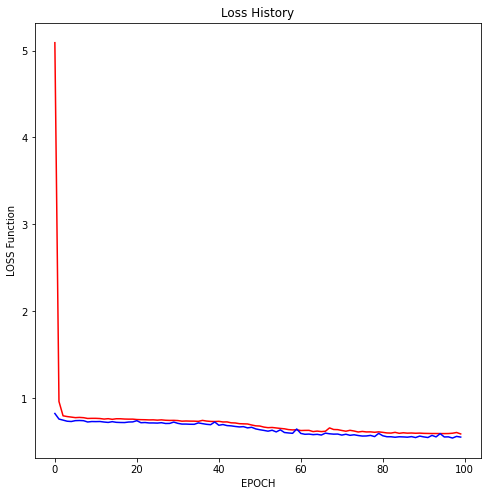

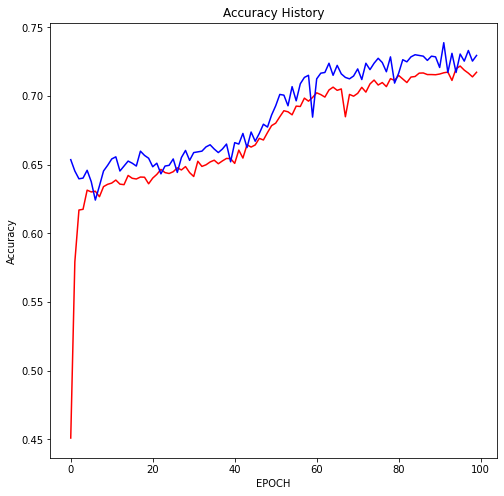

In [62]:
draw_graph(history)